In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('luminosity_data.csv')
df.head()

,Timestamp,Value,Type
0,3:09:25 AM.227,ArduinoIoTCloudTCP::handle_ConnectMqttBroker c...,received
1,3:09:25 AM.227,1375\r\n,received
2,3:09:25 AM.690,1383\r\n,received
3,3:09:26 AM.186,1383\r\n,received
4,3:09:26 AM.682,1383\r\n,received


In [3]:
df.drop(['Timestamp','Type'],axis='columns',inplace=True)
df.head()

,Value
0,ArduinoIoTCloudTCP::handle_ConnectMqttBroker c...
1,1375\r\n
2,1383\r\n
3,1383\r\n
4,1383\r\n


In [4]:
df.dtypes

Value    object
dtype: object

In [5]:
df['Value']=df['Value'].str.replace(r'\\[a-zA-Z]', '', regex=True)
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')
df.isna().sum()

Value    7
dtype: int64

In [6]:
df = df.dropna()
df.isna().sum()

Value    0
dtype: int64

In [7]:
df=df[df['Value'] != 0]

In [8]:
df.head()

,Value
1,1375.0
2,1383.0
3,1383.0
4,1383.0
5,1389.0


In [9]:
def bulb_data_creation(x):
    if x >= 1250:
        return 0
    elif x < 1250:
        return 1
    else:
        return 2

In [30]:
df['LightStatus']=df['Value'].apply(bulb_data_creation)
df.sample(10)

,Value,LightStatus
262,48.0,1
322,32.0,1
159,1105.0,1
29,1421.0,0
17,1405.0,0
310,137.0,1
71,1361.0,0
271,49.0,1
231,1308.0,0
283,30.0,1


In [21]:
X=df['Value'].values.reshape(-1, 1) 
y=df['LightStatus']

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [25]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)
clf.score(X_test,y_test)

0.9887640449438202

In [26]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc.score(X_test,y_test)

0.9887640449438202

In [33]:
rfc.predict([[1105.0]])
y_pred=rfc.predict(X_test)

In [37]:
from sklearn.metrics import confusion_matrix
conf_mat=confusion_matrix(y_test, y_pred)

<Axes: >

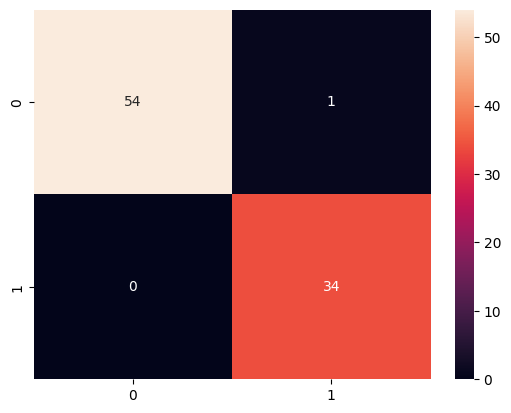

In [40]:
import seaborn as sns
sns.heatmap(conf_mat,annot=True)

In [ ]:
# Export the trained model using pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(rf, file)

print("Model exported successfully!")